# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"
config = dict({'scrollZoom': True})

from joblib import dump

# Data Processing

In [2]:
data = pd.read_csv('D:/ML_Data/finance_peddie_hacks/finance_data.csv')
data = data.drop(columns='Extras')
data.rename(columns = {'Expenses ': 'Expenses', 'Profit ': 'Profit'}, inplace = True)

In [3]:
data

,Month Name,Month Number,Total Sales/Revenue,Expenses,Profit
0,Jan 2020,1,3000,1200,1800
1,Feb 2020,2,3200,1280,1920
2,Mar 2020,3,2600,1040,1560
3,Apr 2020,4,2700,1080,1620
4,May 2020,5,2400,960,1440
5,Jun 2020,6,2800,1120,1680
6,Jul 2020,7,3100,1240,1860
7,Aug 2020,8,3300,1320,1980
8,Sep 2020,9,3460,1384,2076
9,Oct 2020,10,3600,1440,2160


In [4]:
data['Rolling Revenue'] = data['Total Sales/Revenue'].rolling(window=2).mean()
data['Rolling Expenses'] = data['Expenses'].rolling(window=2).mean()
data['Rolling Profit'] = data['Profit'].rolling(window=2).mean()

data.at[0,'Rolling Revenue']= 3000
data.at[0,'Rolling Expenses']= 1200
data.at[0,'Rolling Profit']= 1800

In [5]:
data = data.fillna(0)
data

,Month Name,Month Number,Total Sales/Revenue,Expenses,Profit,Rolling Revenue,Rolling Expenses,Rolling Profit
0,Jan 2020,1,3000,1200,1800,3000.0,1200.0,1800.0
1,Feb 2020,2,3200,1280,1920,3100.0,1240.0,1860.0
2,Mar 2020,3,2600,1040,1560,2900.0,1160.0,1740.0
3,Apr 2020,4,2700,1080,1620,2650.0,1060.0,1590.0
4,May 2020,5,2400,960,1440,2550.0,1020.0,1530.0
5,Jun 2020,6,2800,1120,1680,2600.0,1040.0,1560.0
6,Jul 2020,7,3100,1240,1860,2950.0,1180.0,1770.0
7,Aug 2020,8,3300,1320,1980,3200.0,1280.0,1920.0
8,Sep 2020,9,3460,1384,2076,3380.0,1352.0,2028.0
9,Oct 2020,10,3600,1440,2160,3530.0,1412.0,2118.0


In [22]:
data.to_csv('finance.csv')

# Data Visualization

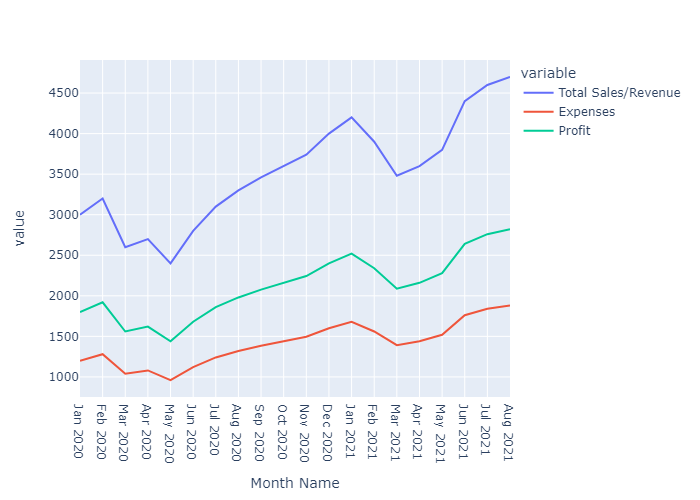

In [6]:
px.line(data, x='Month Name', y=['Total Sales/Revenue', 'Expenses', 'Profit'])

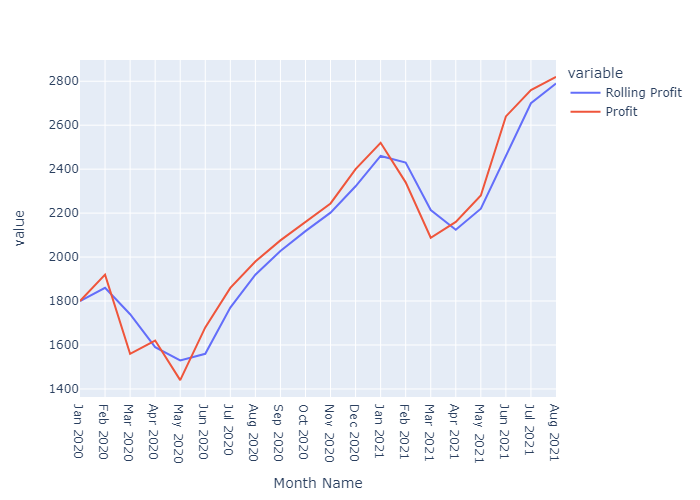

In [7]:
px.line(data, x='Month Name', y=['Rolling Profit', 'Profit'])

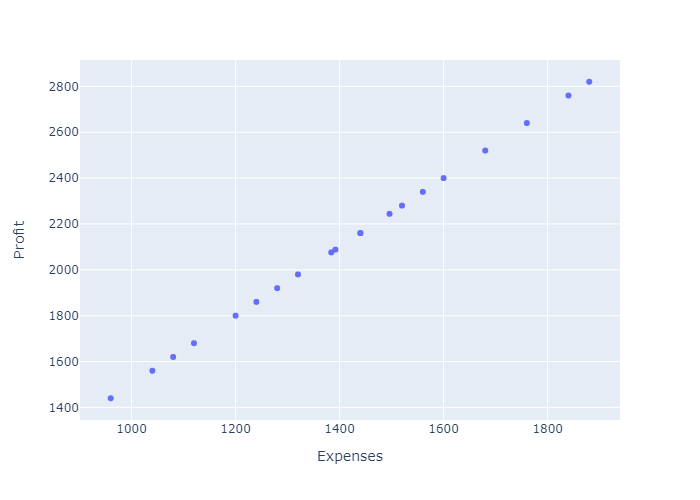

In [8]:
px.scatter(data, x='Expenses', y='Profit')

# Profit Modelling

In [9]:
X1 = data['Rolling Profit']
y1 = data['Profit']

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 5)

X_train1 = np.array(X_train1).reshape(-1,1)
y_train1 = np.array(y_train1).reshape(-1,1)
X_test1 = np.array(X_test1).reshape(-1,1)
y_test1 = np.array(y_test1).reshape(-1,1)

In [11]:
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)
lr1.score(X_test1, y_test1)

0.9421218241987974

In [12]:
dump(lr1, 'rolling_profit_model.joblib')

['rolling_profit_model.joblib']

# Profit Forecasting

In [13]:
X2 = data['Month Number']
y2 = data['Profit']

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 5)

X_train2 = np.array(X_train2).reshape(-1,1)
y_train2 = np.array(y_train2).reshape(-1,1)
X_test2 = np.array(X_test2).reshape(-1,1)
y_test2 = np.array(y_test2).reshape(-1,1)

In [15]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)
lr2.score(X_test2, y_test2)

0.8735438754258045

In [16]:
lr2.predict([[23]])

array([[2735.97786292]])

In [17]:
dump(lr2, 'profit_forecast.joblib')

['profit_forecast.joblib']

# Expense Forecasting

In [23]:
X3 = data['Month Number']
y3 = data['Expenses']

In [24]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 5)

X_train3 = np.array(X_train3).reshape(-1,1)
y_train3 = np.array(y_train3).reshape(-1,1)
X_test3 = np.array(X_test3).reshape(-1,1)
y_test3 = np.array(y_test3).reshape(-1,1)

In [25]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)
lr3.score(X_test3, y_test3)

0.8735438754258043

In [28]:
lr3.predict([[23]])

array([[1823.98524195]])

In [29]:
dump(lr3, 'expenses_forecasting.joblib')

['expenses_forecasting.joblib']